In [1]:
import pandas as pd
import geopandas as gpd
from census import Census
import matplotlib.pyplot as plt
import contextily as ctx
pd.options.display.max_columns =200
import numpy as np
import mapclassify as mc

In [168]:
demand = pd.read_csv("./data_processing/model_results/30_50_70_County_level_highdemand.csv")
svi_pop = pd.read_csv("./data_processing/model_results/30_50_70_County_level_SVI_pop.csv")
hotspot = pd.read_csv("./data_processing/model_results/30_50_70_County_level_hotspot.csv")
hotspot_svi = pd.read_csv("./data_processing/model_results/30_50_70_hot_spot_SVI_county.csv")
normalized = pd.read_csv("./data_processing/model_results/priority_normalized_for_policies.csv")
            

In [169]:
cnty = gpd.read_file("./data_processing/tl_2019_us_county/tl_2019_us_county.shp")

In [170]:
demand.head()

,County FIPS,demand_covered,total_demand_of_county,hot_spot,county_name,state_name,priority,percentage_for_30,percentage_for_50,percentage_for_70
0,1001,19,23,0.041168,Autauga,AL,23,82.608696,100.0,100.0
1,1003,22,27,0.012095,Baldwin,AL,27,81.481481,100.0,100.0
2,1005,12,12,0.048611,Barbour,AL,12,100.000000,100.0,100.0
3,1007,3,3,0.013396,Bibb,AL,3,100.000000,100.0,100.0
4,1009,5,5,0.008647,Blount,AL,5,100.000000,100.0,100.0


In [171]:
svi_pop.sort_values(by='priority',ascending=False)

,County FIPS,demand_covered,total_demand_of_county,hot_spot,county_name,state_name,priority,percentage_for_30,percentage_for_50,percentage_for_70
204,6037,5000,5000,0.049805,Los Angeles,CA,7.712042e+06,100.000000,100.000000,100.000000
610,17031,3802,8998,0.174711,Cook,IL,3.478982e+06,42.253834,70.415648,98.588575
2623,48201,1085,1085,0.023020,Harris,TX,3.410562e+06,100.000000,100.000000,100.000000
1858,36061,1390,1390,0.023952,New York,NY,3.197569e+06,100.000000,100.000000,100.000000
103,4013,1094,1094,0.024390,Maricopa,AZ,2.850032e+06,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...
1739,31171,0,1,0.138504,Thomas,NE,2.527000e+00,0.000000,0.000000,0.000000
1632,30069,0,0,0.000000,Petroleum,MT,1.412300e+00,100.000000,100.000000,100.000000
1705,31103,0,0,0.000000,Keya Paha,NE,8.060000e-01,100.000000,100.000000,100.000000
264,8039,0,6,0.022448,Elbert,CO,0.000000e+00,0.000000,100.000000,100.000000


In [172]:
hotspot['priority_adjust'] = hotspot['priority']*1000

In [173]:
hotspot_svi.head()

,County FIPS,demand_covered,total_demand_of_county,hot_spot,county_name,state_name,priority,percentage_for_30,percentage_for_50,percentage_for_70
0,1001,19,23,0.041168,Autauga,AL,17.924430,82.608696,100.0,100.0
1,1003,22,27,0.012095,Baldwin,AL,2.614924,81.481481,100.0,100.0
2,1005,12,12,0.048611,Barbour,AL,48.411245,100.000000,100.0,100.0
3,1007,3,3,0.013396,Bibb,AL,8.041886,100.000000,100.0,100.0
4,1009,5,5,0.008647,Blount,AL,3.667900,100.000000,100.0,100.0


In [174]:
normalized.head()

,FIPS,high_demand_priority,SVI_hotspot_priority,SVI_pop_priority,hotspot_priority
0,1001,0.002556,0.884993,0.835007,0.010630
1,1003,0.003001,0.884115,0.835520,0.003123
2,1005,0.001334,0.886743,0.835012,0.012552
3,1007,0.000333,0.884426,0.834773,0.003459
4,1009,0.000556,0.884175,0.835011,0.002233


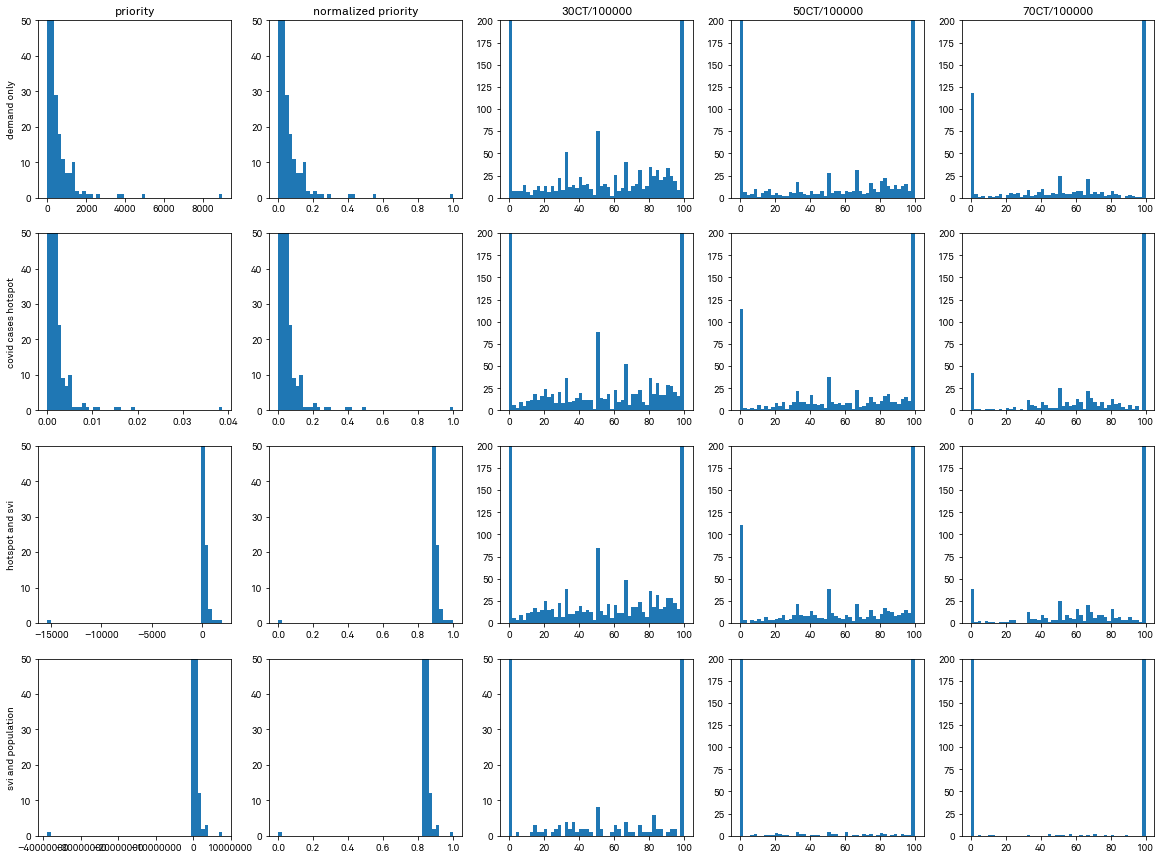

In [175]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# df = sns.load_dataset('iris')
from matplotlib import rcParams
# rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Akkurat Pro']



ylim = [0,50]
ylim2 = [0,200]

# plot
f, ax = plt.subplots(4, 5, figsize=(20, 15), sharex=False)
ax[0,0].set_title('priority')
ax[0,1].set_title('normalized priority')
ax[0,2].set_title('30CT/100000')
ax[0,3].set_title('50CT/100000')
ax[0,4].set_title('70CT/100000')

ax[0,0].set_ylabel('demand only')
ax[1,0].set_ylabel('covid cases hotspot')
ax[2,0].set_ylabel('hotspot and svi')
ax[3,0].set_ylabel('svi and population')

# demand
ax[0,0].hist(demand['priority'],bins=50)
ax[0,1].hist(normalized['high_demand_priority'],bins=50)

ax[0,2].hist(demand['percentage_for_30'],bins=50)
ax[0,3].hist(demand['percentage_for_50'],bins=50)
ax[0,4].hist(demand['percentage_for_70'],bins=50)

# ax[0,0].set_ylim(ylim)
ax[0,0].set_ylim(ylim)
ax[0,1].set_ylim(ylim)
ax[0,2].set_ylim(ylim2)
ax[0,3].set_ylim(ylim2)
ax[0,4].set_ylim(ylim2)


# hotspot
ax[1,0].hist(hotspot['priority'],bins=50)
ax[1,1].hist(normalized['hotspot_priority'],bins=50)

ax[1,2].hist(hotspot['percentage_for_30'],bins=50)
ax[1,3].hist(hotspot['percentage_for_50'],bins=50)
ax[1,4].hist(hotspot['percentage_for_70'],bins=50)

ax[1,0].set_ylim(ylim)
ax[1,1].set_ylim(ylim)
ax[1,2].set_ylim(ylim2)
ax[1,3].set_ylim(ylim2)
ax[1,4].set_ylim(ylim2)


# hotspot and svi
ax[2,0].hist(hotspot_svi['priority'],bins=50)
ax[2,1].hist(normalized['SVI_hotspot_priority'],bins=50)

ax[2,2].hist(hotspot_svi['percentage_for_30'],bins=50)
ax[2,3].hist(hotspot_svi['percentage_for_50'],bins=50)
ax[2,4].hist(hotspot_svi['percentage_for_70'],bins=50)

ax[2,0].set_ylim(ylim)
ax[2,1].set_ylim(ylim)
ax[2,2].set_ylim(ylim2)
ax[2,3].set_ylim(ylim2)
ax[2,4].set_ylim(ylim2)


# svi_population

ax[3,0].hist(svi_pop['priority'],bins=50)
ax[3,1].hist(normalized['SVI_pop_priority'],bins=50)
ax[3,2].hist(svi_pop['percentage_for_30'],bins=50)
ax[3,3].hist(svi_pop['percentage_for_50'],bins=50)
ax[3,4].hist(svi_pop['percentage_for_70'],bins=50)

ax[3,0].ticklabel_format(useOffset=False,style='plain')

ax[3,0].set_ylim(ylim)
ax[3,1].set_ylim(ylim)
ax[3,2].set_ylim(ylim)
ax[3,3].set_ylim(ylim2)
ax[3,4].set_ylim(ylim2)


plt.show()

In [176]:
demand['GEOID'] = demand['County FIPS'].astype(str).str.pad(width=5,side='left',fillchar='0')
svi_pop['GEOID'] = svi_pop['County FIPS'].astype(str).str.pad(width=5,side='left',fillchar='0')
hotspot['GEOID'] = hotspot['County FIPS'].astype(str).str.pad(width=5,side='left',fillchar='0')
hotspot_svi['GEOID'] = hotspot_svi['County FIPS'].astype(str).str.pad(width=5,side='left',fillchar='0')
normalized['GEOID'] = normalized['FIPS'].astype(str).str.pad(width=5,side='left',fillchar='0')


In [177]:
demand_geo = cnty.merge(demand, on='GEOID')
svi_pop_geo = cnty.merge(svi_pop, on='GEOID')
hotspot_geo = cnty.merge(hotspot, on='GEOID')
hotspot_svi_geo = cnty.merge(hotspot_svi, on='GEOID')
normalized_geo = cnty.merge(normalized, on='GEOID')

In [178]:
demand_geo = demand_geo.to_crs("EPSG:3857")
svi_pop_geo = svi_pop_geo.to_crs("EPSG:3857")
hotspot_geo = hotspot_geo.to_crs("EPSG:3857")
hotspot_svi_geo = hotspot_svi_geo.to_crs("EPSG:3857")
normalized_geo = normalized_geo.to_crs("EPSG:3857")

In [179]:
lower_view = gpd.read_file("data/lower_48.geojson")
lower_view = lower_view.to_crs("EPSG:3857")
lower48_xlim = ([lower_view.total_bounds[0],lower_view.total_bounds[2]])
lower48_ylim = ([lower_view.total_bounds[1],lower_view.total_bounds[3]])


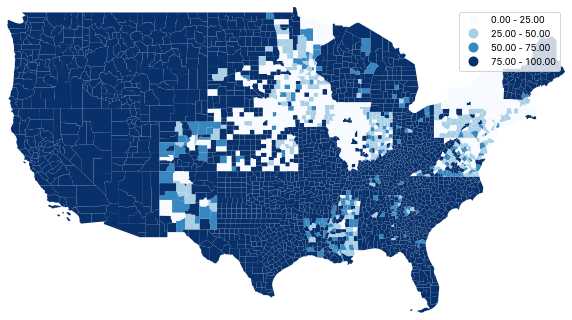

In [126]:
fig, ax = plt.subplots(figsize=(10,10))
demand_geo.plot(column='percentage_for_30', 
                scheme='EqualInterval', k=4, cmap='Blues',
                legend=True,ax=ax)
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_axis_off()
plt.show()

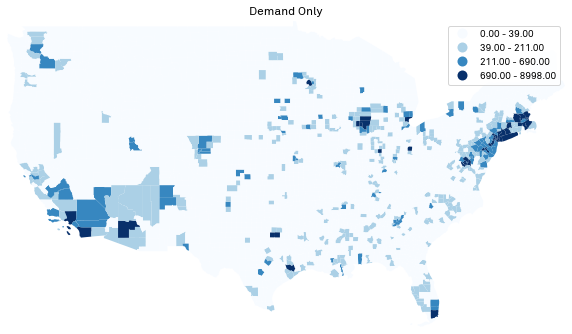

JenksCaspall              

     Interval        Count
--------------------------
[   0.00,   39.00] |  2682
(  39.00,  211.00] |   317
( 211.00,  690.00] |    96
( 690.00, 8998.00] |    47

In [147]:
fig, ax = plt.subplots(figsize=(10,10))
demand_geo.plot(column='priority', 
                scheme='JenksCaspall', k=4, cmap='Blues',
                legend=True,ax=ax)
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title('Demand Only')
ax.set_axis_off()
plt.show()
mc.JenksCaspall(demand_geo['priority'],k=4)

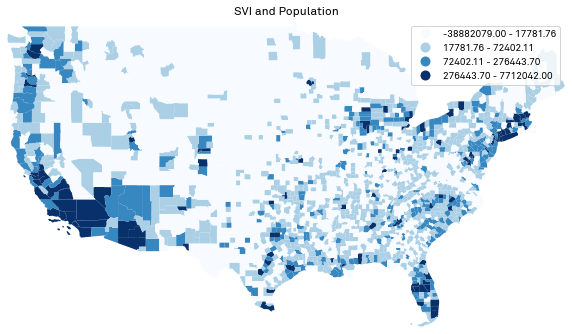

JenksCaspall                        

          Interval             Count
------------------------------------
[-38882079.00,     17781.76] |  1875
(    17781.76,     72402.11] |   849
(    72402.11,    276443.70] |   301
(   276443.70,   7712042.00] |   117

In [185]:
fig, ax = plt.subplots(figsize=(10,10))
svi_pop_geo.plot(column='priority', 
                scheme='JenksCaspall', k=4, cmap='Blues',
                legend=True,ax=ax)
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title('SVI and Population')
ax.set_axis_off()
plt.show()
mc.JenksCaspall(svi_pop_geo['priority'],k=4)

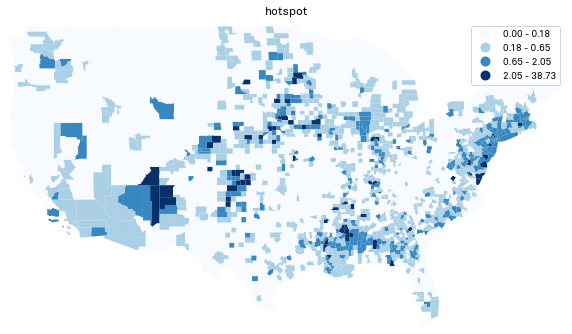

JenksCaspall          

   Interval      Count
----------------------
[ 0.00,  0.18] |  1883
( 0.18,  0.65] |   867
( 0.65,  2.05] |   318
( 2.05, 38.73] |    74

In [182]:
fig, ax = plt.subplots(figsize=(10,10))
hotspot_geo.plot(column='priority_adjust', 
                scheme='JenksCaspall', k=4, cmap='Blues',
                legend=True,ax=ax)
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title('hotspot')
ax.set_axis_off()
plt.show()
mc.JenksCaspall(hotspot_geo['priority_adjust'],k=4)

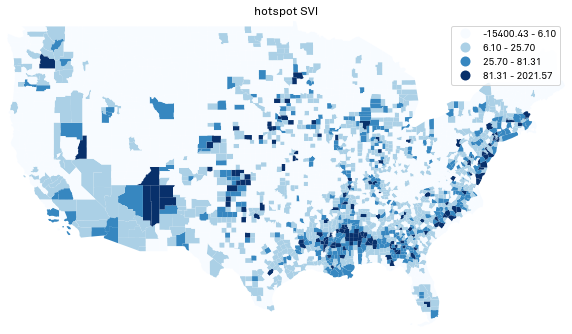

JenksCaspall                  

       Interval          Count
------------------------------
[-15400.43,      6.10] |  1761
(     6.10,     25.70] |   840
(    25.70,     81.31] |   374
(    81.31,   2021.57] |   167

In [184]:
fig, ax = plt.subplots(figsize=(10,10))
hotspot_svi_geo.plot(column='priority', 
                scheme='JenksCaspall', k=4, cmap='Blues',
                legend=True,ax=ax)
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title('hotspot SVI')
ax.set_axis_off()
plt.show()
mc.JenksCaspall(hotspot_svi_geo['priority'],k=4)